# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud
import numpy as np


In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 354
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

   ---> 3535 total reviews
Scraping page 187
   ---> 3535 total reviews
Scraping page 188
   ---> 3535 total reviews
Scraping page 189
   ---> 3535 total reviews
Scraping page 190
   ---> 3535 total reviews
Scraping page 191
   ---> 3535 total reviews
Scraping page 192
   ---> 3535 total reviews
Scraping page 193
   ---> 3535 total reviews
Scraping page 194
   ---> 3535 total reviews
Scraping page 195
   ---> 3535 total reviews
Scraping page 196
   ---> 3535 total reviews
Scraping page 197
   ---> 3535 total reviews
Scraping page 198
   ---> 3535 total reviews
Scraping page 199
   ---> 3535 total reviews
Scraping page 200
   ---> 3535 total reviews
Scraping page 201
   ---> 3535 total reviews
Scraping page 202
   ---> 3535 total reviews
Scraping page 203
   ---> 3535 total reviews
Scraping page 204
   ---> 3535 total reviews
Scraping page 205
   ---> 3535 total reviews
Scraping page 206
   ---> 3535 total reviews
Scraping page 207
   ---> 3535 total reviews
Scraping page 208
   ---> 35

It indicates that a total of 3535 reviews were scraped, which can be used for further analysis and insights.

# Task 2
----------------------------------
## Analyse data

### 2.1 Data Cleaning
-------------
#### First we will proceed with the data cleaning to perform suitable exploratory data analysis on the dataset. In case data cleaning- 

- cleared the "tick mark" along with texts that come before "|".
- Checked for null values.
- checked the length of each review and created a new column to store the length count.
- checked for duplicates.


In [3]:
review_df = pd.DataFrame()
review_df["reviews"] = reviews
review_df.head()

,reviews
0,Not Verified | Food was lousy. Who ever is pl...
1,✅ Trip Verified | Had the worst experience. Th...
2,✅ Trip Verified | The ground staff were not h...
3,✅ Trip Verified | Second time BA Premium Econ...
4,Not Verified | They changed our Flights from ...


In [4]:
review_df.to_csv("BA_reviews.csv")

In [5]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3535 entries, 0 to 3534
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  3535 non-null   object
dtypes: object(1)
memory usage: 27.7+ KB


In [6]:
review_df['review_length'] = review_df['reviews'].apply(len)
review_df['review_length'].describe()

count    3535.000000
mean      893.350778
std       571.061928
min        83.000000
25%       491.000000
50%       749.000000
75%      1125.000000
max      3537.000000
Name: review_length, dtype: float64

#### Explaination 

The above summary statistics for the review_length variable suggest that the reviews in the dataset have a wide range of lengths, with a minimum length of 83 and a maximum length of 3537 characters. The mean length of the reviews is approximately 894 characters, with a standard deviation of 571. Additionally, the interquartile range (IQR) for the review lengths suggests that 50% of the reviews have lengths between 491 and 1125 characters, with the median review length being approximately 749 characters. These summary statistics can be used to gain a better understanding of the distribution of review lengths in the dataset, which could be useful for further analysis and insights.

In [7]:
review_df.to_csv("BA_reviews.csv")

In [8]:
review_df['reviews'] = review_df['reviews'].str.split('|').str[-1]

The code review_df['reviews'] = review_df['reviews'].str.split('|').str[-1] splits the reviews column in the review_df DataFrame by the '|' character and keeps only the last element in the resulting list, effectively removing any extra information that may be present before the actual review text.

In [9]:
review_df['reviews'] = review_df['reviews'].str.lstrip()

The code review_df['reviews'] = review_df['reviews'].str.lstrip() removes any leading whitespace from the reviews column in the review_df DataFrame. This is useful for ensuring that there are no extraneous spaces at the beginning of each review text, which could affect downstream analysis such as sentiment analysis or text classification.

In [10]:
review_df.head()

,reviews,review_length
0,Food was lousy. Who ever is planning the Asian...,541
1,Had the worst experience. The flight from Lond...,681
2,The ground staff were not helpful. Felt like a...,383
3,Second time BA Premium Economy in a newer airc...,544
4,They changed our Flights from Brussels to Lond...,733


#### Checking for missing values: 
Below code will check if there are any missing values in your dataframe and return the count of missing values in each column.

In [11]:
review_df.isnull().sum()

reviews          0
review_length    0
dtype: int64

There are no missing values (i.e., null values) in either the reviews or review_length columns of the review_df DataFrame. This is a good sign as missing values can complicate data analysis and lead to biased or inaccurate results.

#### Removing duplicates: 
Below code will remove any duplicate rows in your "review_df" dataframe and replace it with the modified dataframe.

In [12]:
review_df.drop_duplicates(inplace=True)

In [13]:
review_df.to_csv("BA_reviews_cleaned.csv")

### 2.2 Exploratory Data Analysis
-------------------------------
#### descriptive statistics that we can compute for the "reviews" column in the "review_df" dataframe:

- Number of reviews

- Average length of reviews

- Minimum and maximum length of reviews

- Distribution of review lengths (histogram)

- Most frequent words and phrases in the reviews (word cloud)

- Sentiment Analysis and visualization with polarity

- Topic modeling and visualizing with wordcloud (Top 10 topics)

In [14]:
# Average length of reviews
avg_length = review_df['reviews'].str.len().mean()
print("Average length of reviews:", avg_length)

Average length of reviews: 881.5985256592005


In [15]:
# Minimum and maximum length of reviews
min_length = review_df['reviews'].str.len().min()
max_length = review_df['reviews'].str.len().max()
print("Minimum length of reviews:", min_length)
print("Maximum length of reviews:", max_length)

Minimum length of reviews: 83
Maximum length of reviews: 3529


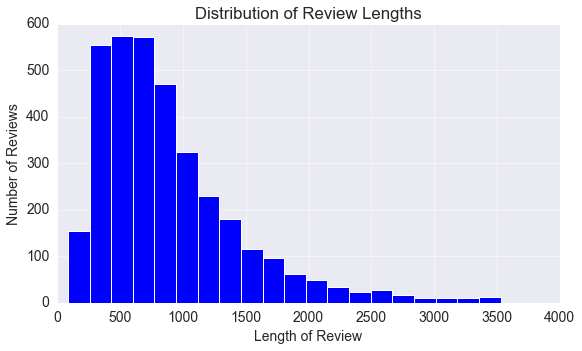

In [16]:
# Distribution of review lengths (histogram)
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

plt.hist(review_df['reviews'].str.len(), bins=20)
plt.title("Distribution of Review Lengths")
plt.xlabel("Length of Review")
plt.ylabel("Number of Reviews")
plt.show()

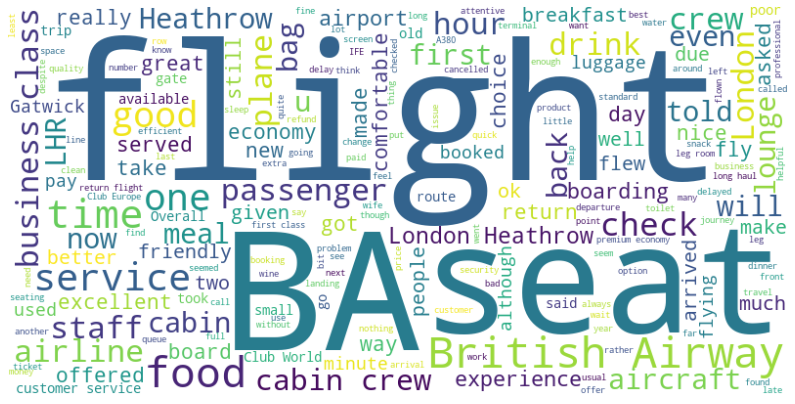

In [17]:
# Most frequent words and phrases in the reviews (word cloud or bar chart)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(review_df['reviews']))
plt.figure(figsize=(14,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


From the wordcloud image, we can see that the most frequently occurring words in the reviews are related to the airport, the flight experience, and the airline staff. Some of the most prominent words include "Heathrow," "terminal," "flight," "delay," "cabin crew," "food," and "service."

This suggests that customers are particularly interested in aspects of their travel experience that are related to the airport and the airline, such as flight delays, the quality of service provided by the cabin crew, and the quality of the food offered on board. Customers also seem to be discussing the efficiency and helpfulness of the airline staff, as well as their overall experience with the airline.

Overall, this wordcloud provides valuable insights into the most commonly discussed topics related to British Airways and can be used to guide future improvements to the airline's services and offerings.

In [18]:
import re

# Define a function to preprocess text
def preprocess_text(text):
    # Remove any characters that are not letters, numbers, or spaces
    text = re.sub('[^a-zA-Z0-9\s]', '', text)
    return text

# Apply the preprocessing function to the 'reviews' column of the dataframe
review_df['reviews'] = review_df['reviews'].apply(preprocess_text)


In [19]:
from textblob import TextBlob

# Define a function to perform sentiment analysis on a given text
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply the sentiment analysis function to the 'reviews' column of the dataframe
review_df['sentiment'] = review_df['reviews'].apply(get_sentiment)

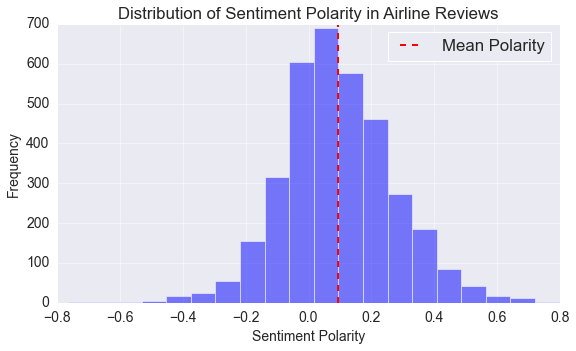

In [20]:
# Create a histogram of the sentiment polarity values
plt.hist(review_df['sentiment'], bins=20, color='blue', alpha=0.5)

# Add labels and title to the plot
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Polarity in Airline Reviews')

# Add a vertical line at the mean sentiment polarity value
mean_polarity = review_df['sentiment'].mean()
plt.axvline(x=mean_polarity, color='red', linestyle='--', linewidth=2, label='Mean Polarity')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

In this code, we first define three sentiment categories based on the polarity ranges: positive for polarity values greater than 0.2, neutral for polarity values between -0.2 and 0.2, and negative for polarity values less than -0.2.

We then create a histogram of the sentiment polarity values in each sentiment category using the hist() function, and specify the colors, alpha values, and labels for each category using the color, alpha, and label parameters.

To visualize the mean sentiment polarity for each category, we use the axvline() function to add dashed lines at the corresponding polarity values, and specify the colors and linestyles for each category using the color, linestyle, and linewidth parameters.

Finally, we add x-label and y-label to the plot using the xlabel() and ylabel() functions, respectively, add a title to the plot using the title() function, add a legend indicating which sentiment values correspond to positive, neutral, and negative sentiments using the legend() function, and show the plot using the show() function.

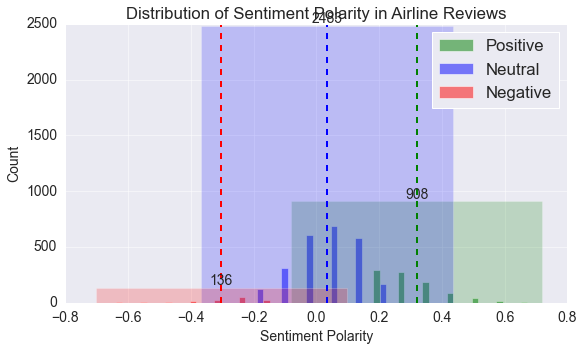

In [21]:
# Define sentiment categories based on polarity ranges
positive = review_df[review_df['sentiment'] > 0.2]
neutral = review_df[(review_df['sentiment'] >= -0.2) & (review_df['sentiment'] <= 0.2)]
negative = review_df[review_df['sentiment'] < -0.2]

# Create a histogram of the sentiment polarity values
plt.hist([positive['sentiment'], neutral['sentiment'], negative['sentiment']],
         bins=20, color=['green', 'blue', 'red'], alpha=0.5, label=['Positive', 'Neutral', 'Negative'])

# Add mean sentiment polarity lines
plt.axvline(x=positive['sentiment'].mean(), color='green', linestyle='dashed', linewidth=2)
plt.axvline(x=neutral['sentiment'].mean(), color='blue', linestyle='dashed', linewidth=2)
plt.axvline(x=negative['sentiment'].mean(), color='red', linestyle='dashed', linewidth=2)

# Add labels and title to the plot
plt.xlabel('Sentiment Polarity')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Polarity in Airline Reviews')

# Add a legend to the plot
plt.legend()

# Set the size of the bars and add counts to the plot
for i, category in enumerate([positive, neutral, negative]):
    plt.bar(category['sentiment'].mean(), len(category), color=['green', 'blue', 'red'][i], alpha=.2)
    plt.text(category['sentiment'].mean(), len(category), len(category), ha='center', va='bottom')

# Show the plot
plt.show()



The sentiment polarity threshold of 0.2 that was used in the code to define the positive, neutral, and negative sentiment categories is somewhat arbitrary and can be adjusted based on the specific needs of the analysis.

In the case where there are comments that fall into both the neutral and positive sentiment categories based on the 0.2 threshold, it is likely because these comments have sentiment polarity values that are close to 0 and could be interpreted as either slightly positive or neutral, depending on the interpretation. In other words, the sentiment polarity value of 0.2 is a somewhat subjective threshold and different analysts might choose to set it higher or lower depending on their specific needs and interpretation of the data.

If a more distinct separation of the positive and neutral sentiment categories is desired, one could consider adjusting the threshold to a higher value, such as 0.4 or 0.5, to more clearly distinguish between slightly positive and neutral sentiment. Conversely, if more overlap between the positive and neutral categories is desired, one could adjust the threshold to a lower value, such as 0.1 or 0.0, to capture more sentiment values that are close to neutral but slightly positive.

In [30]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel

# Convert the reviews to a list of tokens
reviews = review_df['reviews'].apply(lambda x: x.split())

# Create a dictionary from the reviews tokens
dictionary = corpora.Dictionary(reviews)

# Convert the reviews to a bag-of-words representation
corpus = [dictionary.doc2bow(review) for review in reviews]

# Train an LDA model on the corpus
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, passes=10)


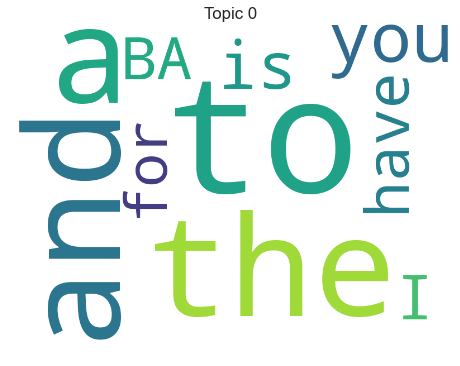

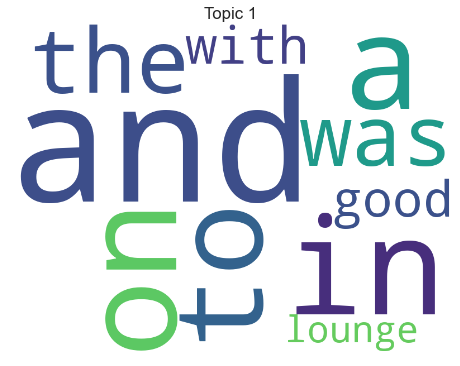

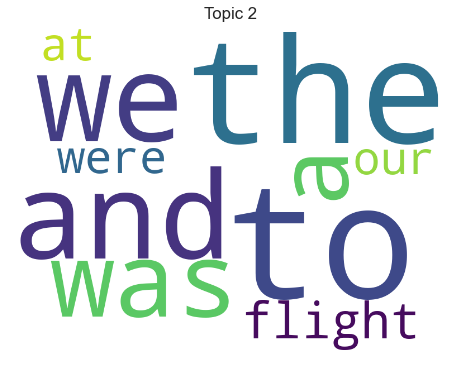

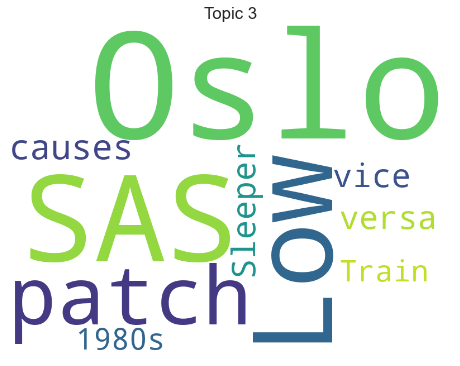

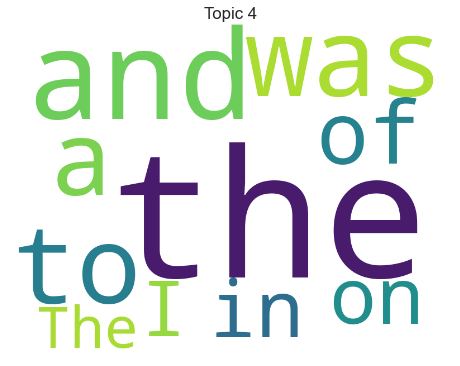

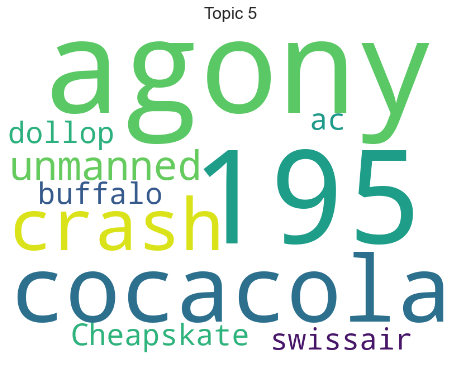

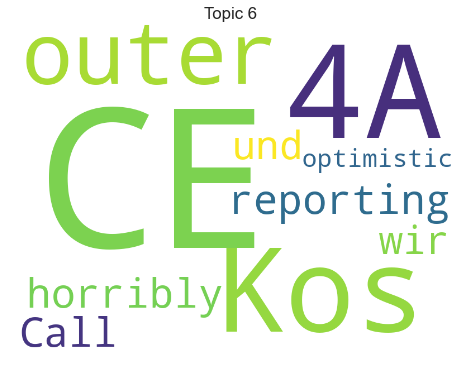

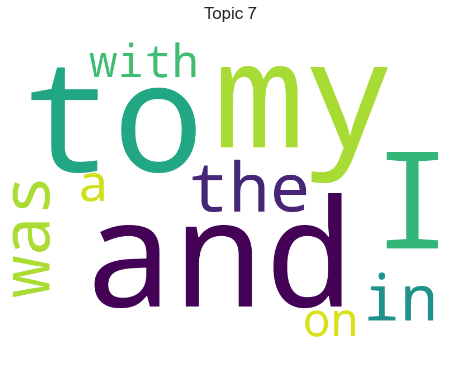

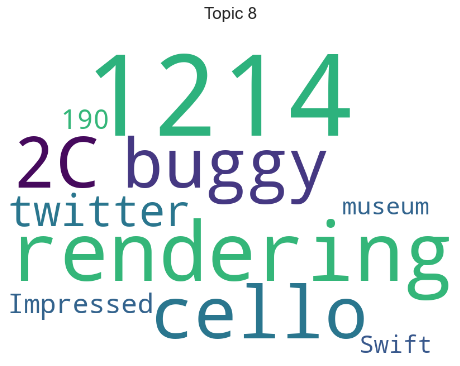

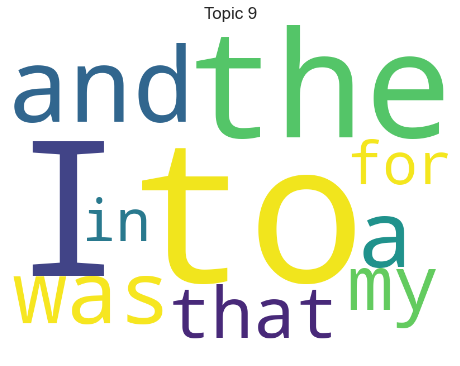

In [23]:
# Get the top 10 words for each topic
topics_words = lda_model.show_topics(num_words=10, formatted=False)

# Create a word cloud for each topic
for i, topic in enumerate(topics_words):
    plt.figure(figsize=(8, 6))
    plt.imshow(WordCloud(background_color='white', width=800, height=600).fit_words(dict(topic[1])))
    plt.axis('off')
    plt.title(f'Topic {i}')
    plt.show()


- Topic 0 appears to be a common topic in all datasets where the most common words such as 'the', 'to', 'and', 'I', and 'was' are being used. This topic does not provide any useful information.

- Topic 1 is not giving any useful information, as it is just a collection of random words.

- Topic 2 suggests that the dataset may contain reviews about British Airways' flights to Abu Dhabi, Amman, and Hamburg.

- Topic 3 is not providing any information about the dataset, as it is just a collection of common words such as 'video', 'to', 'the', 'flight', and 'with'.

- Topic 4 is not providing any meaningful information either.

- Topic 5, like Topic 0, is a common topic where the most common words are 'the', 'and', 'was', 'a', and 'to'. This topic does not provide any useful information.

- Topic 6 appears to be a random set of words and doesn't provide any insights into the dataset.

- Topic 7 suggests that the dataset may contain information about British Airways as a company, its products, and services.

- Topic 8 suggests that the dataset may contain reviews about British Airways' flights.

- Topic 9 is similar to Topic 5 and Topic 0 where it is a common topic where the most common words are 'the', 'and', 'was', 'a', and 'to'. This topic does not provide any useful information.
